# Making plot for Castro et al paper --> CD80-CD86

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [4]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [5]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

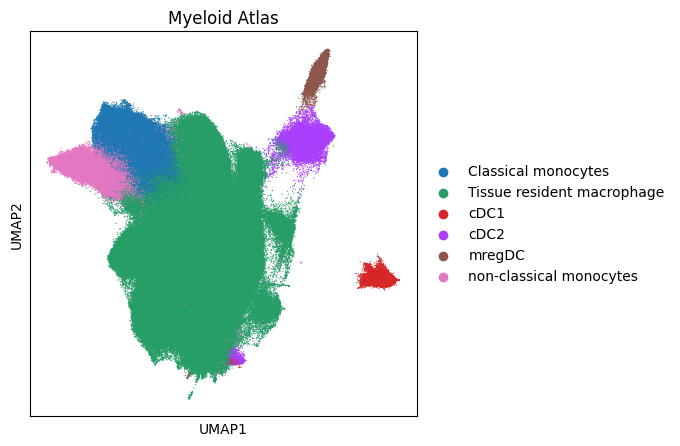

In [6]:
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, color="MyeloidAPC_Subsets", size=3, title="Myeloid Atlas")

## Notes
* Classical monocytes, cDC1, cDC2
* CD80/CD86 expression in cDC2s/monocytes in tumours 

In [7]:
dot_vars = ["CD80","CD86","CD83","CD70"]

In [8]:
data_P = data[data.obs["sample_type_major2"].isin(["primary tumour"])]
data_M = data[data.obs["sample_type_major2"].isin(["metastatic tumour"])]
data_H = data[data.obs["sample_type_major2"].isin(["healthy"])]

In [9]:
data_P_DC1 = data_P[data_P.obs["NR_annotations_simple"].isin(["cDC1"])]
data_P_DC2 = data_P[data_P.obs["NR_annotations_simple"].isin(["cDC2"])]
data_P_mregDC = data_P[data_P.obs["NR_annotations_simple"].isin(["mregDC"])]
data_P_mono = data_P[data_P.obs["NR_annotations_simple"].isin(["Classical monocytes"])]

data_M_DC1 = data_M[data_M.obs["NR_annotations_simple"].isin(["cDC1"])]
data_M_DC2 = data_M[data_M.obs["NR_annotations_simple"].isin(["cDC2"])]
data_M_mregDC = data_M[data_M.obs["NR_annotations_simple"].isin(["mregDC"])]
data_M_mono = data_M[data_M.obs["NR_annotations_simple"].isin(["Classical monocytes"])]

data_H_DC1 = data_H[data_H.obs["NR_annotations_simple"].isin(["cDC1"])]
data_H_DC2 = data_H[data_H.obs["NR_annotations_simple"].isin(["cDC2"])]
data_H_mregDC = data_H[data_H.obs["NR_annotations_simple"].isin(["mregDC"])]
data_H_mono = data_H[data_H.obs["NR_annotations_simple"].isin(["Classical monocytes"])]

In [10]:
# Set directory for saving plots
sc.settings.figdir = "Castro_dotplots_svg4"
sc.settings.dpi = 600

In [11]:
data.var.index.isin(dot_vars)

array([False, False, False, ..., False, False, False])

In [6]:
from tqdm import tqdm
data2 = data.raw.to_adata()
data2.var["keep"] = False
for i in tqdm(data2.var.index):
    if i in dot_vars:
        data2.var.loc[i, "keep"] = True

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15074/15074 [00:00<00:00, 3617194.26it/s]


In [7]:
data2.var.keep.value_counts()

keep
False    15068
True         6
Name: count, dtype: int64

In [10]:
import numpy as np
np.max(data2.X)

8.941265918373597

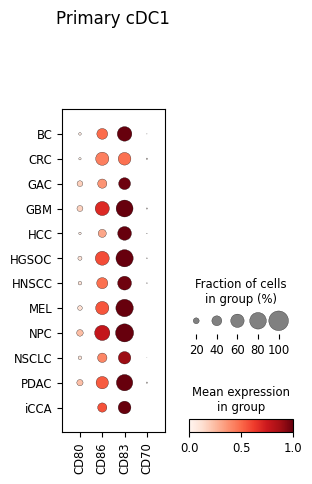

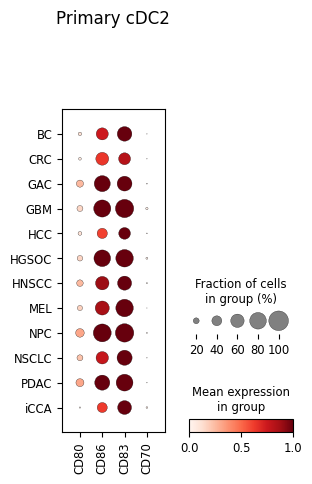

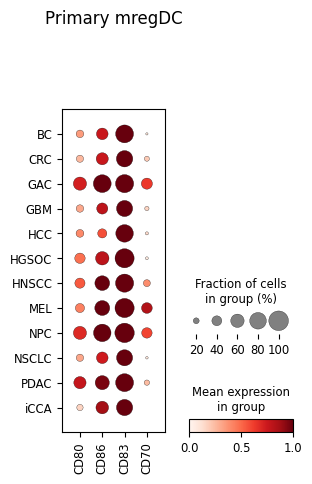

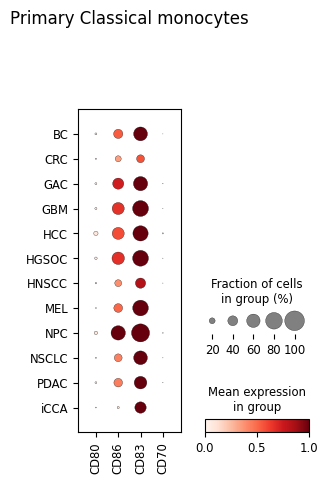

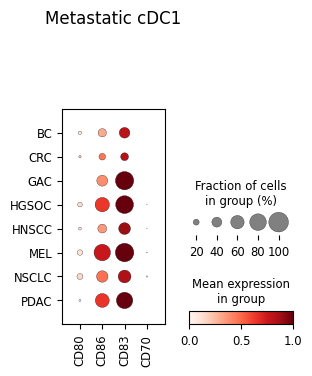

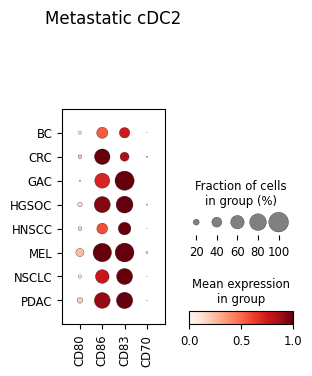

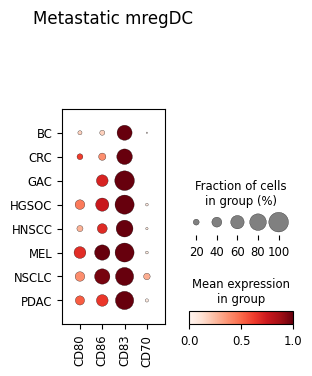

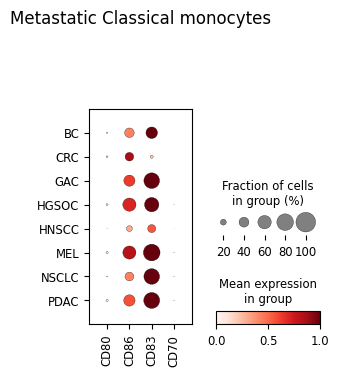

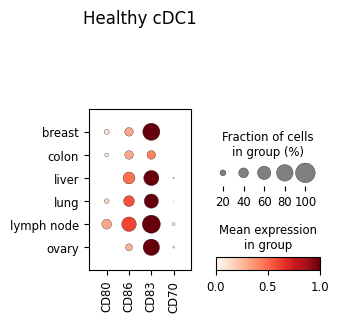

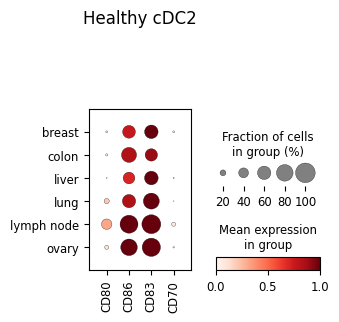

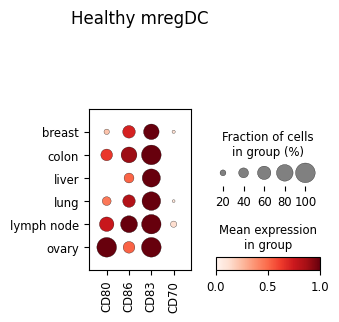

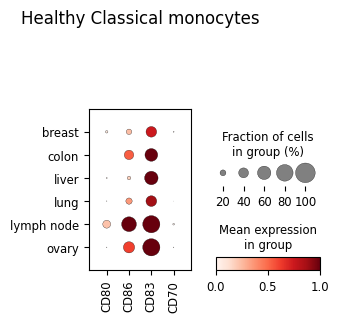

In [11]:
sc.pl.dotplot(data_P_DC1, dot_vars, groupby="cancer_broadest", title="Primary cDC1", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Primary_cDC1_costims.svg")
sc.pl.dotplot(data_P_DC2, dot_vars, groupby="cancer_broadest", title="Primary cDC2", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Primary_cDC2_costims.svg")
sc.pl.dotplot(data_P_mregDC, dot_vars, groupby="cancer_broadest", title="Primary mregDC", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Primary_mregDC_costims.svg")
sc.pl.dotplot(data_P_mono, dot_vars, groupby="cancer_broadest", title="Primary Classical monocytes", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Primary_mono_costims.svg")

sc.pl.dotplot(data_M_DC1, dot_vars, groupby="cancer_broadest", title="Metastatic cDC1", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Mets_cDC1_costims.svg")
sc.pl.dotplot(data_M_DC2, dot_vars, groupby="cancer_broadest", title="Metastatic cDC2", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Mets_cDC2_costims.svg")
sc.pl.dotplot(data_M_mregDC, dot_vars, groupby="cancer_broadest", title="Metastatic mregDC", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Mets_mregDC_costims.svg")
sc.pl.dotplot(data_M_mono, dot_vars, groupby="cancer_broadest", title="Metastatic Classical monocytes", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Mets_mono_costims.svg")

sc.pl.dotplot(data_H_DC1, dot_vars, groupby="site", title="Healthy cDC1", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Healthy_cDC1_costims.svg")
sc.pl.dotplot(data_H_DC2, dot_vars, groupby="site", title="Healthy cDC2", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Healthy_cDC2_costims.svg")
sc.pl.dotplot(data_H_mregDC, dot_vars, groupby="site", title="Healthy mregDC", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Healthy_mregDC_costims.svg")
sc.pl.dotplot(data_H_mono, dot_vars, groupby="site", title="Healthy Classical monocytes", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_Healthy_mono_costims.svg")

In [13]:
data_HGSOC = data[data.obs["cancer_with_H"].isin(["HGSOC"])]

In [15]:
data_HGSOC_DC1 = data_HGSOC[data_HGSOC.obs["NR_annotations_simple"].isin(["cDC1"])]
data_HGSOC_DC2 = data_HGSOC[data_HGSOC.obs["NR_annotations_simple"].isin(["cDC2"])]
data_HGSOC_mregDC = data_HGSOC[data_HGSOC.obs["NR_annotations_simple"].isin(["mregDC"])]
data_HGSOC_mono = data_HGSOC[data_HGSOC.obs["NR_annotations_simple"].isin(["Classical monocytes"])]

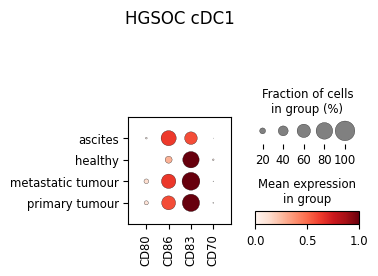

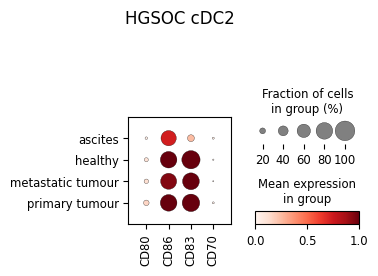

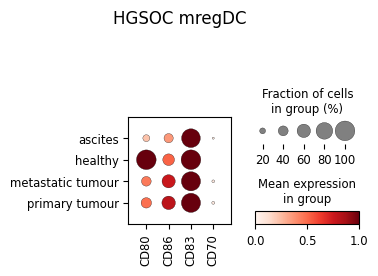

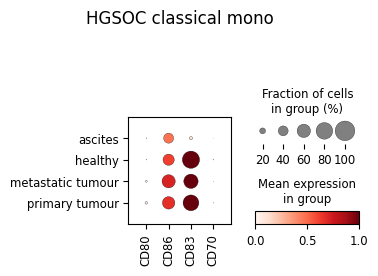

In [16]:
sc.pl.dotplot(data_HGSOC_DC1, dot_vars, groupby="sample_type_major2", title="HGSOC cDC1", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_HGSOC_costims_DC1.svg")
sc.pl.dotplot(data_HGSOC_DC2, dot_vars, groupby="sample_type_major2", title="HGSOC cDC2", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_HGSOC_costims_DC2.svg")
sc.pl.dotplot(data_HGSOC_mregDC, dot_vars, groupby="sample_type_major2", title="HGSOC mregDC", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_HGSOC_costims_mregDC.svg")
sc.pl.dotplot(data_HGSOC_mono, dot_vars, groupby="sample_type_major2", title="HGSOC classical mono", dot_min=0.0, dot_max=1.0, vmin=0, vmax=1, save="_HGSOC_costims_mono.svg")